In [512]:
using Graphs
using CairoMakie
using LinearAlgebra

g = complete_graph(5)

{5, 10} undirected simple Int64 graph

In [ ]:
using Graphs
using LinearAlgebra

# function repulsive_force(pu, pv, c_rep=4.2)
#     return (c_rep/norm(pv - pu)^2.0) * normalize(pu - pv)
# end

# function spring_force(pu, pv, c_spring=1.4, l = 2.0)
#     return c_spring * log(norm(pv - pu)/l) * normalize(pv - pu)
# end

# function attractive_force(pu, pv)
#     spring_force(pu, pv) - repulsive_force(pu, pv)
# end

#Fruchterman and Reingold
function repulsive_force(pu, pv, l=4.0)
    return (l^2/norm(pv - pu)) * (pu - pv)/norm(pu - pv)
end

function attractive_force(pu, pv, l=8.0)
    return (norm(pv-pu)/l) * (pv - pu)/norm(pv -pu)
end


function displacement_vector(graph, u, p)
    displacement = [0.0 0.0]
    for v in vertices(graph)
        if u != v
            displacement += repulsive_force(p[u], p[v])
            if has_edge(graph, u, v)
                displacement += attractive_force(p[u], p[v])
            end
        end
    end
    return displacement
end

function initialize_p(g)
    return Dict( v => [cos((v-1)*2*pi/(nv(g)))  sin((v-1)*2*pi/(nv(g)))] .* rand(1,2) for v in range(1, nv(g)))
end

function delta(t)
    return 0.99^t
end

function gen_eades(graph, p, epsilon=0.01, t_max=100)
    forces = Dict(v => [epsilon epsilon] for v in vertices(graph))
    t = 1 #time
    # continue until time is up or forces are to weak 
    while t < t_max && maximum(map(norm, values(forces))) > epsilon
        for u in vertices(graph)
            forces[u] = displacement_vector(graph, u, p)
        end
        for u in vertices(graph)
            p[u] += delta(t) * forces[u]
        end
        t += 1
    end
    return p
end

gen_eades (generic function with 3 methods)

In [535]:
using Graphs

function generate_graph(sequence::String, structure::String)
    graph = complete_graph(0)
    add_vertices!(graph, length(sequence))
    buffer = []
    for (i, c) in enumerate(structure)
        if c == '('
            push!(buffer, i)
        elseif c == ')' 
            j = pop!(buffer)
            success = add_edge!(graph, i, j)
        end

        if i != 1
            add_edge!(graph, i, i-1)
        end
    end
    return graph
end

g = generate_graph(
    "CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAUGAAGUG", 
    "...(((((((..((((((.........))))))......).((((((.......))))))..))))))..."
)

{71, 89} undirected simple Int64 graph

In [536]:
p = initialize_p(g)
gen_eades(g, p)

Dict{Int64, Matrix{Float64}} with 71 entries:
  5  => [5102.4 -557.282]
  56 => [-1624.16 -4685.89]
  16 => [-1846.78 4445.47]
  20 => [-1980.45 5906.5]
  35 => [-2668.94 1373.38]
  55 => [-1873.16 -4870.04]
  60 => [-41.7031 -3030.05]
  30 => [-1889.74 4421.57]
  19 => [-2010.29 5645.62]
  32 => [-1649.03 3384.69]
  49 => [-2368.74 -5060.02]
  6  => [4554.39 -476.085]
  67 => [5065.12 -586.656]
  45 => [-1355.39 -4421.05]
  44 => [-1017.83 -4066.84]
  9  => [2056.95 -505.273]
  31 => [-1735.01 3950.97]
  64 => [3143.86 -641.399]
  61 => [807.425 -2448.15]
  ⋮  => ⋮

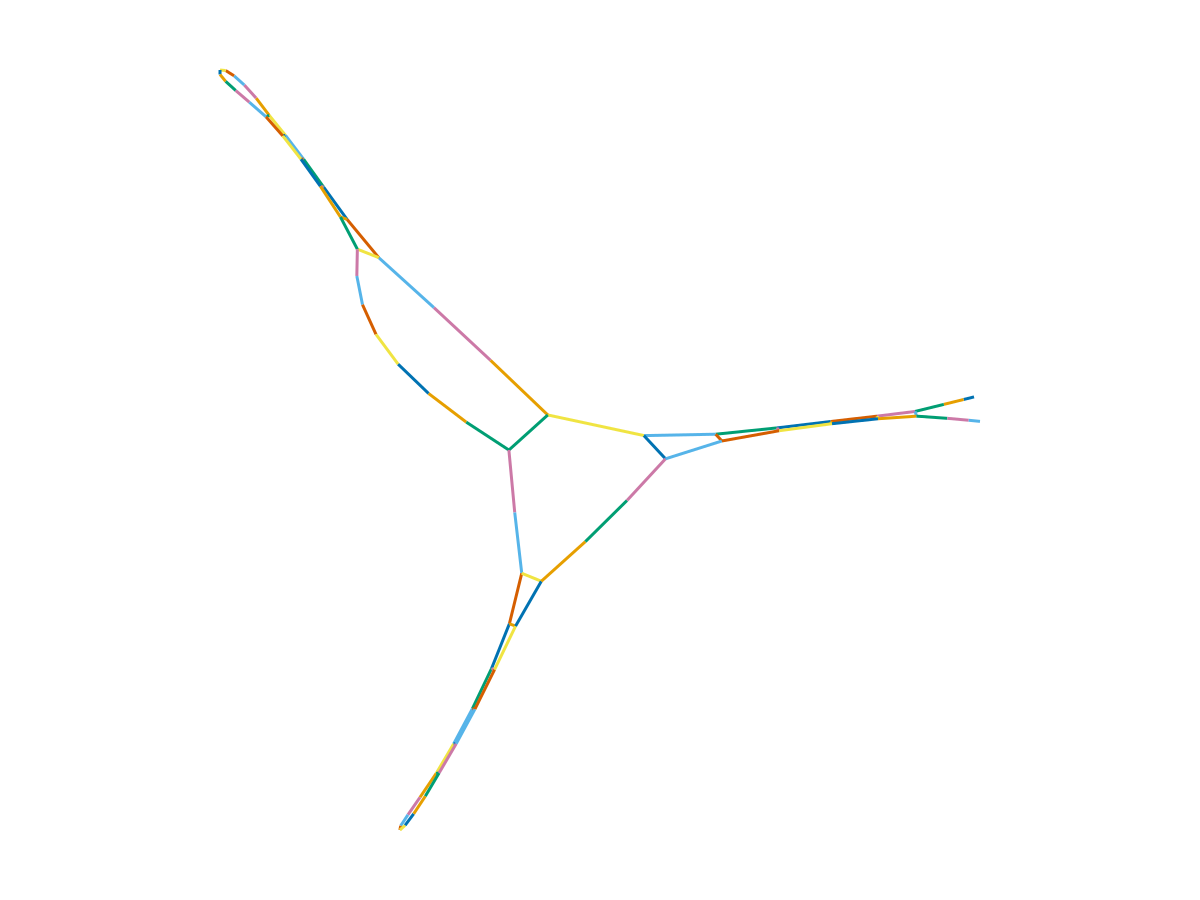

In [541]:
p = initialize_p(g)
gen_eades(g, p)

f = Figure()
ax = Axis(f[1,1])

for e in edges(g)
    srcx, srcy = p[src(e)]
    dstx, dsty = p[dst(e)]
    lines!([srcx, dstx], [srcy, dsty])
end

ax.aspect = 1
hidedecorations!(ax)
hidespines!(ax)

current_figure()